<a href="https://colab.research.google.com/github/sitthatkaja/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis


In [1]:
import pandas as pd

In [2]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv')

In [3]:
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


#**Factor Analysis**

**Assumptions :**

ในข้อมูล multivariale ที่มีตัวแปร observe variable จำนวน n ตัว

มีตัวแปร Factor (Latent  Variables) จำนวน k ตัวที่สามารถอธิบายข้อมูลทั้งหมดได้ 

โดย k < n





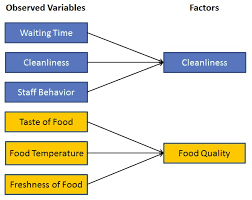

## **Assumptions ในการทำ Factor analysis**

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be perfect ***multicollinearity***.

* There should not be ***homoscedasticity*** between the variables.

***
## **การทำ Factor Analysis**

In [4]:
!pip install factor_analyzer
##แก้ Error ด้วยการ install
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt 
## เหมือนกับ from matplotlib import pyplot as plt

     |████████████████████████████████| 40kB 2.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=0009cdfdb7d5f408b974585c29a2596226a332d2d585354a7864b699d0cf776b
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,...,o5,o6

In [5]:
BFI_data.shape

(2800, 29)

In [6]:
BFI_data_dropped = BFI_data.iloc[:,1:26]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


30 มีนาคม 2564

In [7]:
BFI_data_dropped = BFI_data_dropped.dropna()
BFI_data_dropped.shape

(2436, 25)

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)
chi_square_value, p_value

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

## **Kaiser-Meyer-Olkin (KMO) Test**

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่จะนำไปใช้ใน Factor Analysis

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model

0.8485397221949221

##Factor Analysis

## Import

In [10]:
from factor_analyzer import FactorAnalyzer

### Define

In [11]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [12]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [13]:
data_fa.shape

(2436, 20)

วิธีตัดสินว่าจะลดเหลือกี่ dimension ( มี factors ทั้งหมดกี่ตัว )

In [14]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values 

In [15]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Scree plot

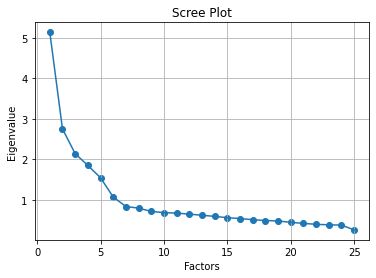

In [16]:
# Create scree plot using matplotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


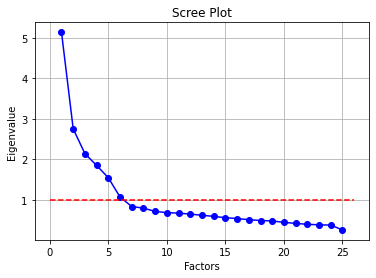

In [17]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [18]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

### Factor loading

In [19]:
fa.loadings_.shape

(25, 20)

In [20]:
fa.loadings_

array([[ 4.39221644e-02, -7.23791989e-03, -3.54953863e-02,
         6.36904232e-02,  1.86674726e-02,  7.56067826e-01,
         3.79571050e-02,  6.18021132e-02, -1.21231838e-03,
         4.98167814e-02, -2.38173505e-02,  4.66514142e-02,
         4.62005355e-02,  3.02085508e-02, -1.17663825e-01,
         1.13469789e-02, -6.77496110e-03, -4.75707513e-02,
         3.80305889e-02, -1.32410506e-05],
       [-3.61660798e-02, -7.05831938e-02,  2.60349595e-02,
         3.14887147e-02,  1.39800152e-02, -3.53463277e-01,
         4.64083497e-02,  8.38715235e-02,  9.55513114e-02,
         8.65737514e-02,  5.62178309e-02,  9.13535039e-02,
         3.71647110e-02,  5.18919280e-02, -6.40070765e-02,
         2.44624623e-02, -5.05741873e-02, -7.11741066e-02,
         3.32392439e-02, -1.03131820e-01],
       [ 1.25240910e-01,  6.35958266e-02,  5.74261728e-01,
         5.81639394e-02,  4.81248438e-02, -2.30739166e-01,
         2.24828463e-02,  4.31813917e-02, -1.31675268e-01,
         9.04356027e-02, -8.5

## รัน Factor Analyzer อีกรอบด้วย parameters จำนวน factor เท่ากับ 6

In [21]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [22]:
fa2.loadings_.shape

(25, 6)

##plot factor loadings

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

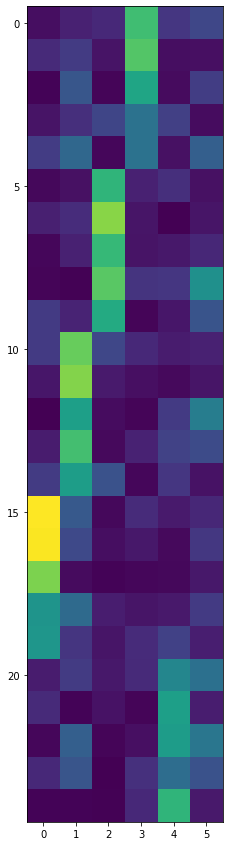

In [27]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

In [28]:
BFI_data_dropped.columns


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

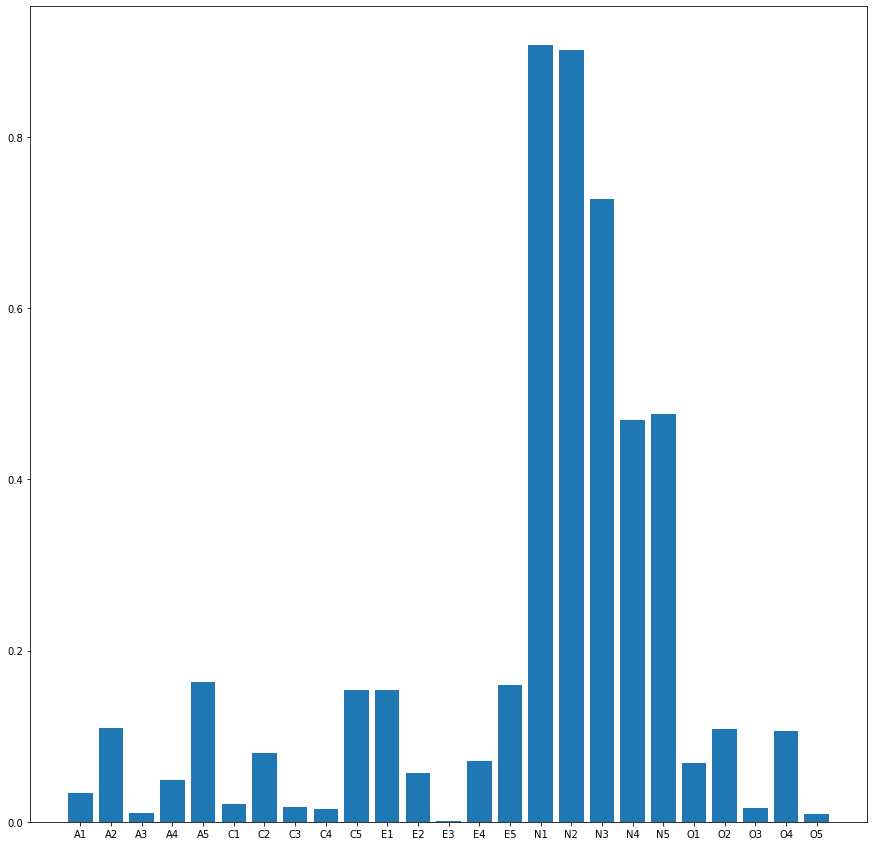

In [29]:

plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

***
## **Exam 3**

ทำ Factor Analysis ข้อมูล Fifa 2018 
***


**ทำการ Import ข้อมูล**

In [30]:
exam = pd.read_csv('FIFA 2018 Statistics.csv')
exam

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


**การนั้นเลือกข้อมูลมาเฉพาะที่ต้องการคือ Goal - scored ถึง red**

In [31]:
exam.shape

(128, 27)

In [37]:
exam_drop = exam.iloc[:,3:20]
exam_drop

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


**ดูขนาดข้อมูล**

In [38]:
exam_drop.shape

(128, 17)

***
**ทำการใช้ Bartlett’s test**

โดยถ้าค่า p value เข้าใกล้ 0 ถึงว่าดี

In [40]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(exam_drop)

chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

**แปลผลจาก output ได้ว่า**
 
**ค่า P-value มีค่า 2.71 x 10^-187 ซึ่งมีค่าเข้าใกล้ 0 มาก**

***
**ทำการใช้ Kaiser-Meyer-Olkin (KMO) Test**

**ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis**

In [41]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(exam_drop)

kmo_model

0.5594556344508279

**แปลผลจาก Output ได้ว่า**

**ค่า KMO จาก model มีค่าประมาณ 0.56 หรือประมาณได้ 0.6 แปลว่าเหมาะสมที่นำไปทำ Factor Analysis**

***
**ทำการ Factor Analysis**

In [51]:
# IMPORT
from factor_analyzer import FactorAnalyzer

In [57]:
# DEFINE กำหนดขนาดที่เลือก
ex_fa = FactorAnalyzer(n_factors=10)

In [58]:
# Fit-transform
data_ex_fa = ex_fa.fit_transform(exam_drop)

In [60]:
# ตรวจสอบ ขนาดข้อมูล
data_ex_fa.shape

(128, 10)

***
**ตัดสินว่าเราจะลดเหลือกี่ dimension โดยการใช้ eigen values**

In [63]:
ev,v = ex_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

**ทำการ scree plot** 

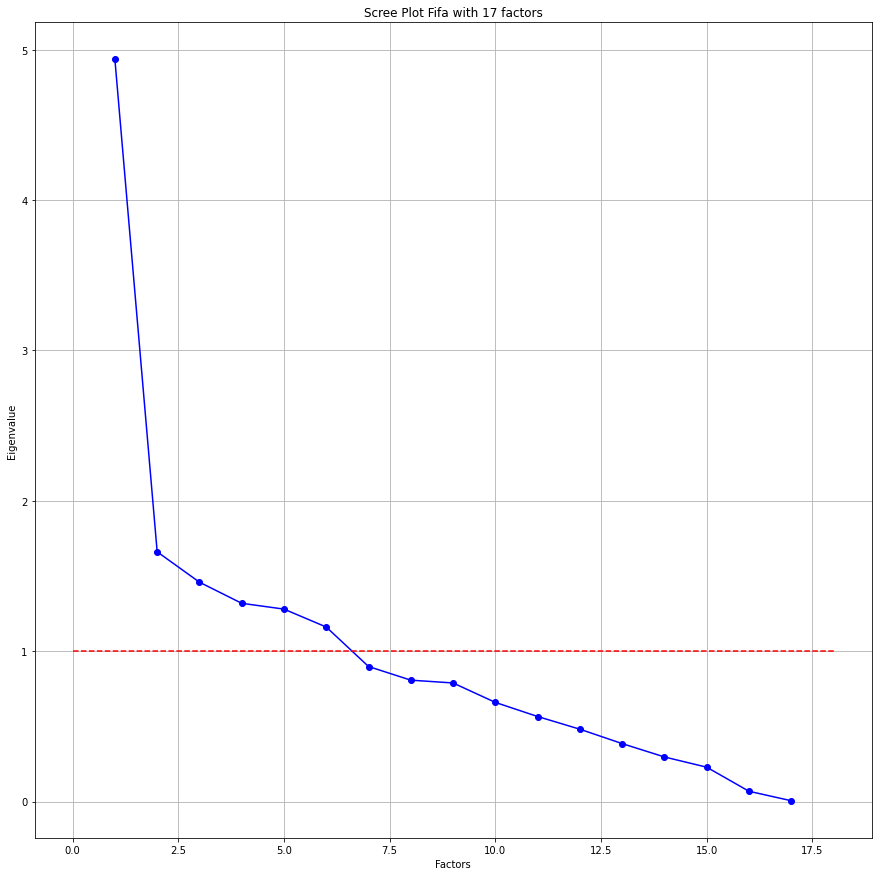

In [68]:
plt.plot(range(1,exam_drop.shape[1]+1),ev,'bo-')
plt.plot([0,exam_drop.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot Fifa with 17 factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**จากข้อมูลจะเห็นได้ว่าจาก 17 factor มีตัวที่มีค่า factor มากกว่า 1 อยู่ 6 ตัว**

In [67]:
data_ex_fa[:,:6]

array([[-1.14061137e+00,  1.05033795e+00,  2.79854567e+00,
         3.57574560e-01, -5.95152711e-02, -7.48334076e-02],
       [ 5.33831171e-01, -1.78150280e-01, -1.10088651e+00,
         1.81432000e-02, -8.36944321e-01, -7.31531607e-01],
       [-7.29379706e-01,  3.96402498e-01, -7.02153492e-01,
        -2.77221903e-01,  1.34345254e-01, -5.61356514e-01],
       [ 7.08580342e-01,  3.36178613e-01, -3.31529441e-01,
        -2.60518967e-01, -1.38667315e+00,  1.34916077e-01],
       [ 3.25530467e-01, -3.71841487e-01, -4.14431700e-01,
         3.27492853e-01,  2.50366459e-01,  2.57255932e-01],
       [-1.34130209e+00, -5.34562069e-01,  2.52429472e-01,
        -5.22235915e-01,  1.05852627e+00, -1.07428697e+00],
       [-5.46867894e-01, -4.92844282e-01,  9.46711298e-01,
        -3.59877314e-01, -1.85391071e-01, -3.25465436e-01],
       [ 1.67488741e+00, -4.32704892e-01,  7.61605381e-01,
        -3.70473849e-01, -8.35201718e-01, -5.88310671e-01],
       [ 2.62530209e-01, -3.24159295e-01,  6.589

***
**จากนั้นทำการ Run Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6**

In [71]:
from factor_analyzer import FactorAnalyzer
ex_fa2 = FactorAnalyzer(n_factors=6)
data_ex_fa = ex_fa2.fit_transform(exam_drop)

In [72]:
ex_fa2.loadings_.shape

# เช็คขนาดของ ex_fa2 

(17, 6)

***
**จากนั้นทำการ Plot factor loadings**

In [73]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

**Matrix plot**

**(Confirmatory Factors Analysis หรือ วิเคราะห์องค์ประกอบเชิงยืนยัน)**

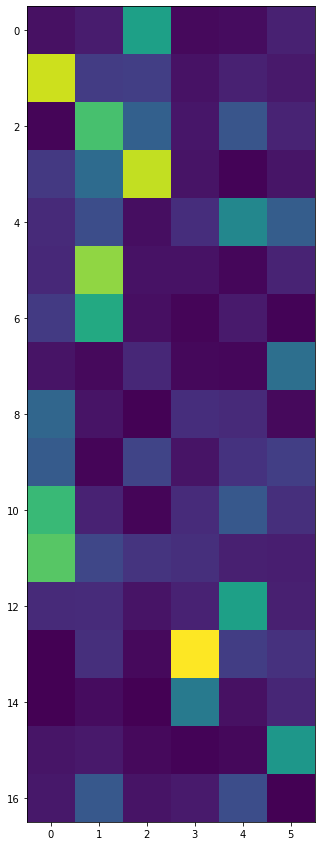

In [76]:
## Matrix plot
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(ex_fa2.loadings_))

**กราฟนี้มีความชัดเจนสีเหลืองอยู่ 4 จุดคือ [1,0] , [5,1] , [3,2] และ [13,3]**


**จากนั้นทำกราฟแท่ง**

**(Exploratory Factors Analysis หรือ การวิเคราะห์องค์ประกอบเชิงสำรวจ)**

In [80]:
exam_drop.columns
## ตรวจสอบชื่อทั้งหมด 17 Factors

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

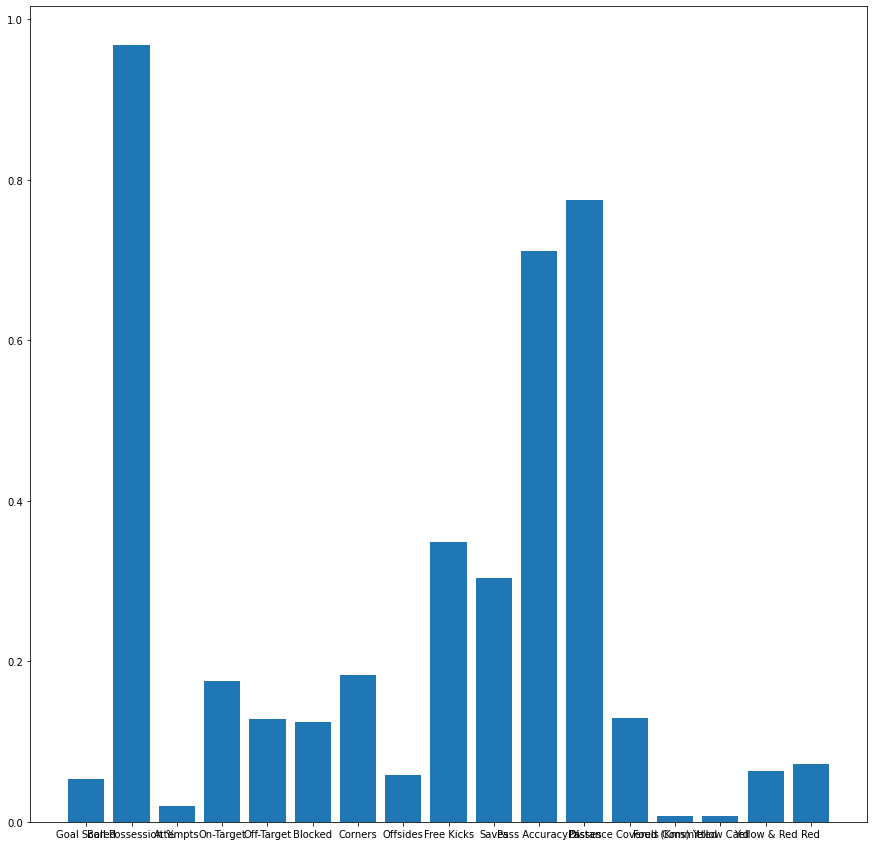

In [81]:
plt.bar(range(17),np.absolute(ex_fa2.loadings_[:,0]),tick_label=exam_drop.columns)

**จากการทำมาทั้งหมดสามารถพูดได้ว่า**

ในข้อมูล Fifa 2018 Statistics นี้

มีตัวแปร Factors จำนวน 6 ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้และสามารถวิเคราะห์องค์ประกอบเชิงสำรวจ (Exporatory Factors Analysis) และ วิเคราะห์องค์ประกอบเชิงยืนยัน (Confirmatory Factors Analysis) ได้
***